In [2]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

from neuropacks import ECOG

%matplotlib inline

In [3]:
data_path = os.path.join(os.environ['HOME'], 'data/ecog/r32_b7.mat')
grid_path = os.path.join(os.environ['HOME'], 'data/ecog/grdid.mat')

In [4]:
fits_path = os.path.join(os.environ['HOME'],
                         'fits/uoineuro/tuning/ecog/ecog_tuning.h5')

In [5]:
ecog = ECOG(data_path=data_path, grid_path=grid_path)
fits = h5py.File(fits_path, 'r')

In [147]:
zero_sel = np.array([44, 46, 47, 63, 76, 23])

In [127]:
Y = ecog.get_response_matrix(bounds=[40, 60], band='HG')
X = ecog.get_design_matrix(form='id', n_gaussians=8)

In [128]:
n_amps = ecog.amp_set.size
n_freqs = ecog.freq_set.size

In [123]:
fras = np.zeros((zero_sel.size, n_amps, n_freqs))

In [176]:
for e_idx, electrode in enumerate(zero_sel):
    for amp_idx, amp in enumerate(ecog.amp_set):
        for freq_idx, freq in enumerate(ecog.freq_set):
            X_id = 100 * amp_idx + freq_idx
            mean_resp = np.mean(Y[np.argwhere(X == X_id).ravel(), electrode])
            fras[e_idx, amp_idx, freq_idx] = mean_resp

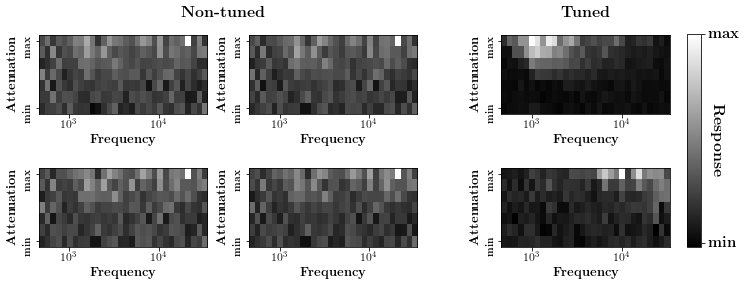

In [244]:
fig, axes = plt.subplots(2, 4, figsize=(9.5, 4),
                         gridspec_kw={'width_ratios': [1, 1, 0.001, 1]})

axes[0, 0].imshow(fras[0] / np.abs(fras[0].max()), vmin=-0.02, vmax=1)
axes[0, 1].imshow(fras[1] / np.abs(fras[1].max()), vmin=-0.02, vmax=1)
axes[1, 0].imshow(fras[2] / np.abs(fras[2].max()), vmin=-0.02, vmax=1)
axes[1, 1].imshow(fras[3] / np.abs(fras[3].max()), vmin=-0.02, vmax=1)
axes[0, 2].axis('off')
axes[1, 2].axis('off')
img = axes[0, 3].imshow(fras[4] / np.abs(fras[4].max()), vmin=-0.02, vmax=1)
axes[1, 3].imshow(fras[5] / np.abs(fras[5].max()), vmin=-0.02, vmax=1)

for ax in axes.ravel():
    ax.set_aspect(2.)
    ax.set_xticks([5, 21])
    ax.set_xticklabels([r'$10^3$', r'$10^4$'])
    ax.tick_params(labelsize=12)
    ax.set_xlabel(r'\textbf{Frequency}', fontsize=13)
    ax.set_ylabel(r'\textbf{Attenuation}', fontsize=13)
    ax.set_yticks([0, 6])
    ax.set_yticklabels([r'\textbf{min}', r'\textbf{max}'], fontsize=10, rotation=90)

fig.text(x=0.27, y=0.96, s=r'\textbf{Non-tuned}', fontsize=16)
fig.text(x=0.825, y=0.96, s=r'\textbf{Tuned}', fontsize=16)    

cax = fig.add_axes([1.01, 0.165, 0.02, 0.74])
cb = fig.colorbar(img, cax=cax)
cb.set_ticks([0, 1])
cb.set_ticklabels([r'\textbf{min}', r'\textbf{max}'])
cb.ax.tick_params(labelsize=15)
cb.set_label(r'\textbf{Response}', fontsize=16, rotation=270, labelpad=-15)
plt.tight_layout()
plt.savefig('FRAs.pdf', bbox_inches='tight')